In [11]:
# A DECISION TREE MODEL TO PREDICT TRANSPORTATION BEHAVIOUR,
# IN DAR ES SALAAM BASED ON VARIOUS FEATURES.

In [12]:
import pandas as pd
import numpy as np
import random

# Seed for reproducibility
np.random.seed(42)

# Features
distances = ["short", "medium", "long"]
times = ["morning", "afternoon", "evening"]
weather = ["sunny", "rainy", "cloudy"]
traffic = ["low", "medium", "high"]
budget = ["low", "medium", "high"]
transport_modes = ["daladala", "bodaboda", "bajaj", "walking"]

# Generating synthetic data
n = 500
data = {
    "Distance": [random.choice(distances) for _ in range(n)],
    "TimeOfDay": [random.choice(times) for _ in range(n)],
    "Weather": [random.choice(weather) for _ in range(n)],
    "Traffic": [random.choice(traffic) for _ in range(n)],
    "Budget": [random.choice(budget) for _ in range(n)],
    "TransportMode": [random.choice(transport_modes) for _ in range(n)]
}

df = pd.DataFrame(data)

# Introducing errors, so that we perform data preprocessing

df.loc[5, "Distance"] = None   # missing value
df.loc[10, "Budget"] = "medum" # typo
df = pd.concat([df, df.iloc[[0]]])  # duplicate row

print(df.head(10))


  Distance  TimeOfDay Weather Traffic  Budget TransportMode
0   medium  afternoon   rainy    high     low      daladala
1    short    evening  cloudy    high    high      bodaboda
2    short    morning   rainy     low    high         bajaj
3     long    morning   sunny    high    high      bodaboda
4     long  afternoon   sunny     low  medium         bajaj
5     None  afternoon   rainy    high    high         bajaj
6    short  afternoon   sunny  medium  medium       walking
7     long  afternoon   rainy  medium    high         bajaj
8    short    evening  cloudy  medium  medium       walking
9    short    morning   rainy     low  medium      bodaboda


In [13]:

# for Data preprocessing, we need to handle missing values, correct typos, remove duplicates,
# encode categorical variables, ect.

import pandas as pd

# Dataset tuliyoitengeneza awali
# Assume df is our raw dataset

# 1. Handle missing values
df = df.dropna()   # tunaondoa rows zenye None

# 2. Correct typos
df["Budget"] = df["Budget"].replace("medum", "medium")

# 3. Remove duplicates
df = df.drop_duplicates()

# 4. Encode categorical variables
df_encoded = pd.get_dummies(df.drop("TransportMode", axis=1))
y = df["TransportMode"]

print("Dataset shape after cleaning:", df_encoded.shape)
print(df_encoded.head())


Dataset shape after cleaning: (387, 15)
   Distance_long  Distance_medium  Distance_short  TimeOfDay_afternoon  \
0          False             True           False                 True   
1          False            False            True                False   
2          False            False            True                False   
3           True            False           False                False   
4           True            False           False                 True   

   TimeOfDay_evening  TimeOfDay_morning  Weather_cloudy  Weather_rainy  \
0              False              False           False           True   
1               True              False            True          False   
2              False               True           False           True   
3              False               True           False          False   
4              False              False           False          False   

   Weather_sunny  Traffic_high  Traffic_low  Traffic_medium  Budget_hi

In [14]:
# Splitting data set to "training dataset" and "test dataset"

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (309, 15)
Test set size: (78, 15)


In [15]:
# After preprocessing we have,
print("Dataset shape after cleaning:", df.shape)

# Check first ten rows
print(df.head(10))

# Checking summary of dataset
print(df.info())

# Check distribution of target variable (TransportMode)
print(df["TransportMode"].value_counts())


Dataset shape after cleaning: (387, 6)
   Distance  TimeOfDay Weather Traffic  Budget TransportMode
0    medium  afternoon   rainy    high     low      daladala
1     short    evening  cloudy    high    high      bodaboda
2     short    morning   rainy     low    high         bajaj
3      long    morning   sunny    high    high      bodaboda
4      long  afternoon   sunny     low  medium         bajaj
6     short  afternoon   sunny  medium  medium       walking
7      long  afternoon   rainy  medium    high         bajaj
8     short    evening  cloudy  medium  medium       walking
9     short    morning   rainy     low  medium      bodaboda
10     long    morning   rainy    high  medium      daladala
<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, 0 to 499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Distance       387 non-null    object
 1   TimeOfDay      387 non-null    object
 2   Weather       

In [33]:
# Decision Tree Model Training

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import pandas as pd

# Target variable
y = df["TransportMode"]

# Features (encoded categorical variables)
X = pd.get_dummies(df.drop("TransportMode", axis=1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    max_depth=5,       # restricting length of tree to avoid overfitting
    random_state=42
)

# Train model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save model together with feature names
features = X.columns.tolist()
joblib.dump((dt_model, features), "decision_tree_transport.pkl")


Accuracy: 0.14102564102564102

Classification Report:
               precision    recall  f1-score   support

       bajaj       0.21      0.35      0.26        23
    bodaboda       0.00      0.00      0.00        20
    daladala       0.22      0.13      0.17        15
     walking       0.08      0.05      0.06        20

    accuracy                           0.14        78
   macro avg       0.13      0.13      0.12        78
weighted avg       0.12      0.14      0.12        78



['decision_tree_transport.pkl']

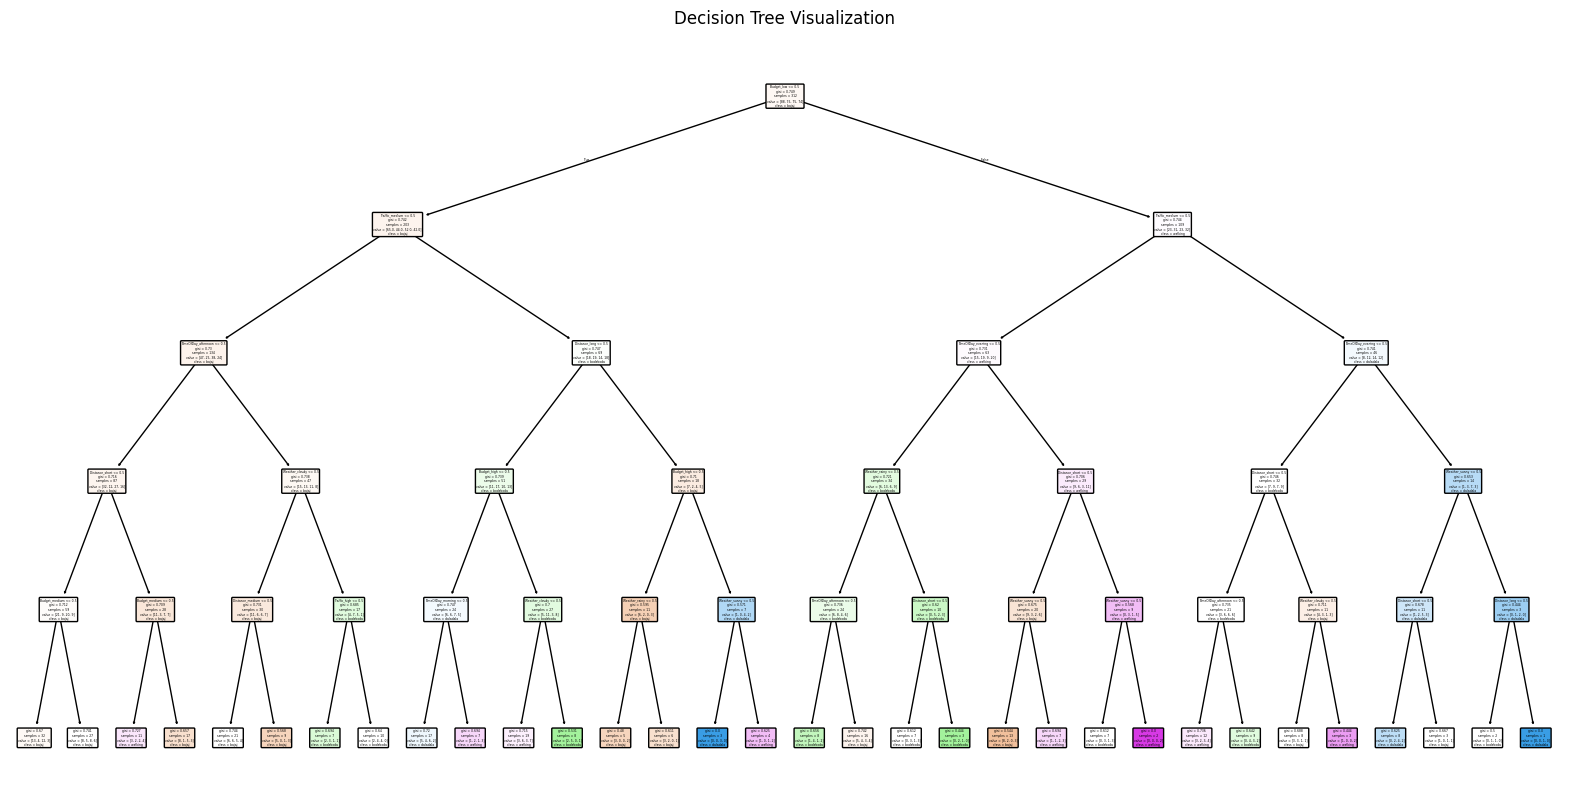

In [34]:
# Visualization for Decision Tree

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(
    dt_model,                      # model yako ya Decision Tree
    feature_names=X.columns,       # majina ya features baada ya pd.get_dummies
    class_names=dt_model.classes_, # majina ya classes (TransportMode)
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
# Consider the deployment code, first by saving the file as .pkl so as we use file without teaching it again

import joblib

# Save the trained model
joblib.dump(model, "decision_tree_transport.pkl")


['decision_tree_transport.pkl']

In [18]:
!pip install streamlit


In [35]:
# Creating app (Streamlit), for easy deployment by app.py
# It will receive user inputs, show prediction to the user, predicting kind of transport etc.

import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Seed
np.random.seed(42)

# Features
distances = ["short", "medium", "long"]
times = ["morning", "afternoon", "evening"]
weather = ["sunny", "rainy", "cloudy"]
traffic = ["low", "medium", "high"]
budget = ["low", "medium", "high"]
transport_modes = ["daladala", "bodaboda", "bajaj", "walking"]

# Generate synthetic data
n = 500
data = {
    "Distance": [random.choice(distances) for _ in range(n)],
    "TimeOfDay": [random.choice(times) for _ in range(n)],
    "Weather": [random.choice(weather) for _ in range(n)],
    "Traffic": [random.choice(traffic) for _ in range(n)],
    "Budget": [random.choice(budget) for _ in range(n)],
    "TransportMode": [random.choice(transport_modes) for _ in range(n)]
}

df = pd.DataFrame(data)

# Clean dataset
df["Distance"].fillna(df["Distance"].mode()[0], inplace=True)
df["Budget"] = df["Budget"].replace("medum", "medium")
df = df.drop_duplicates()

# Features and target
X = pd.get_dummies(df.drop("TransportMode", axis=1))
y = df["TransportMode"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save model together with feature names
features = X.columns.tolist()
joblib.dump((dt_model, features), "decision_tree_transport.pkl")


Decision Tree Accuracy: 0.13924050632911392
Classification Report:
               precision    recall  f1-score   support

       bajaj       0.21      0.22      0.21        23
    bodaboda       0.07      0.20      0.10        10
    daladala       0.15      0.15      0.15        20
     walking       0.20      0.04      0.06        26

    accuracy                           0.14        79
   macro avg       0.16      0.15      0.13        79
weighted avg       0.17      0.14      0.13        79



/tmp/ipython-input-2705090975.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Distance"].fillna(df["Distance"].mode()[0], inplace=True)


['decision_tree_transport.pkl']

In [36]:
# Saving my file to Google Colab

app_code = """
import streamlit as st
import joblib
import pandas as pd

# Load the trained model and features
model, features = joblib.load("decision_tree_transport.pkl")

st.title("AI Transport Mode Predictor - Dar es Salaam")

# User input
distance = st.selectbox("Distance", ["short", "medium", "long"])
time_of_day = st.selectbox("Time of Day", ["morning", "afternoon", "evening"])
weather = st.selectbox("Weather", ["sunny", "rainy", "cloudy"])
traffic = st.selectbox("Traffic", ["low", "medium", "high"])
budget = st.selectbox("Budget", ["low", "medium", "high"])

# Convert input to dataframe
input_data = pd.DataFrame({
    "Distance": [distance],
    "TimeOfDay": [time_of_day],
    "Weather": [weather],
    "Traffic": [traffic],
    "Budget": [budget]
})

# Encode input
input_encoded = pd.get_dummies(input_data)
input_encoded = input_encoded.reindex(columns=features, fill_value=0)

# Prediction
prediction = model.predict(input_encoded)[0]

st.write("### Predicted Transport Mode:", prediction)
"""

# Save code into app.py
with open("app.py", "w") as f:
    f.write(app_code)

print("✅ app.py created successfully")


✅ app.py created successfully


In [37]:
# PERFORMING REGRESSION MODEL (Logistic Regression)

import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Seed for reproducibility
np.random.seed(42)

# Features
distances = ["short", "medium", "long"]
times = ["morning", "afternoon", "evening"]
weather = ["sunny", "rainy", "cloudy"]
traffic = ["low", "medium", "high"]
budget = ["low", "medium", "high"]
transport_modes = ["daladala", "bodaboda", "bajaj", "walking"]

# Generate synthetic data
n = 500
data = {
    "Distance": [random.choice(distances) for _ in range(n)],
    "TimeOfDay": [random.choice(times) for _ in range(n)],
    "Weather": [random.choice(weather) for _ in range(n)],
    "Traffic": [random.choice(traffic) for _ in range(n)],
    "Budget": [random.choice(budget) for _ in range(n)],
    "TransportMode": [random.choice(transport_modes) for _ in range(n)]
}

df = pd.DataFrame(data)

# Clean dataset
df["Distance"].fillna(df["Distance"].mode()[0], inplace=True)
df["Budget"] = df["Budget"].replace("medum", "medium")
df = df.drop_duplicates()

# Features and target
X = df.drop("TransportMode", axis=1)
y = df["TransportMode"]

# One-hot encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save model together with feature names
feature_names = encoder.get_feature_names_out(X.columns)
joblib.dump((log_reg, feature_names), "logistic_regression_transport.pkl")


Logistic Regression Accuracy: 0.20253164556962025
Classification Report:
               precision    recall  f1-score   support

       bajaj       0.13      0.09      0.11        22
    bodaboda       0.25      0.21      0.23        19
    daladala       0.22      0.28      0.24        18
     walking       0.20      0.25      0.22        20

    accuracy                           0.20        79
   macro avg       0.20      0.21      0.20        79
weighted avg       0.20      0.20      0.20        79



/tmp/ipython-input-3879082919.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Distance"].fillna(df["Distance"].mode()[0], inplace=True)


['logistic_regression_transport.pkl']

In [38]:
# Data preprocessing: handle missing values, correct typos, remove duplicates, encode categorical variables

import pandas as pd

# 1. Handle missing values (fill with mode)
df["Distance"].fillna(df["Distance"].mode()[0], inplace=True)

# 2. Correct typos
df["Budget"] = df["Budget"].replace("medum", "medium")

# 3. Remove duplicates
df = df.drop_duplicates()

# 4. Confirm dataset is clean
print(df.isnull().sum())          # check missing values
print(df["Budget"].unique())      # confirm typo corrected
print(df.shape)                   # confirm duplicates removed

# Navigating
print(df.head(20))

# Checking summary of dataset
print(df.info())

# Check distribution of target variable (TransportMode)
print(df["TransportMode"].value_counts())


Distance         0
TimeOfDay        0
Weather          0
Traffic          0
Budget           0
TransportMode    0
dtype: int64
['medium' 'high' 'low']
(395, 6)
   Distance  TimeOfDay Weather Traffic  Budget TransportMode
0     short    evening   sunny    high  medium      bodaboda
1     short  afternoon   sunny  medium    high      bodaboda
2    medium    evening   sunny     low     low         bajaj
3      long    morning   sunny  medium    high      bodaboda
4    medium    morning   sunny     low  medium         bajaj
5    medium  afternoon   rainy  medium     low      daladala
6      long    morning   rainy     low     low      bodaboda
7      long  afternoon   sunny    high    high      bodaboda
8    medium    morning   sunny    high  medium       walking
9     short  afternoon  cloudy     low     low       walking
10   medium    morning  cloudy  medium  medium         bajaj
11     long    morning  cloudy  medium    high       walking
12    short    morning  cloudy    high     low 

/tmp/ipython-input-4109870419.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Distance"].fillna(df["Distance"].mode()[0], inplace=True)


In [39]:
# LOGISTIC REGRESSION MODEL

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Features and target
X = df.drop("TransportMode", axis=1)
y = df["TransportMode"]

# One-hot encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save model together with feature names
feature_names = encoder.get_feature_names_out(X.columns)
joblib.dump((log_reg, feature_names), "logistic_regression_transport.pkl")


Logistic Regression Accuracy: 0.20253164556962025
Classification Report:
               precision    recall  f1-score   support

       bajaj       0.13      0.09      0.11        22
    bodaboda       0.25      0.21      0.23        19
    daladala       0.22      0.28      0.24        18
     walking       0.20      0.25      0.22        20

    accuracy                           0.20        79
   macro avg       0.20      0.21      0.20        79
weighted avg       0.20      0.20      0.20        79



['logistic_regression_transport.pkl']

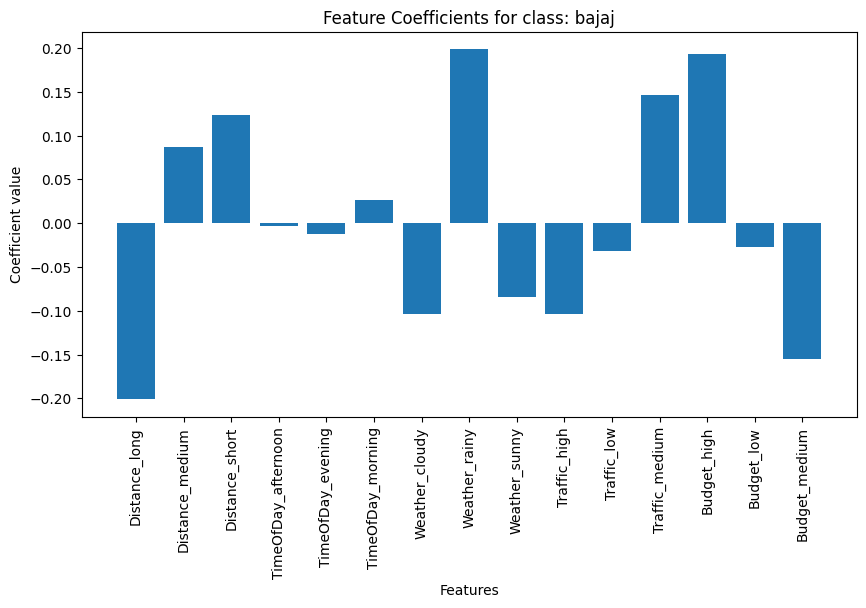

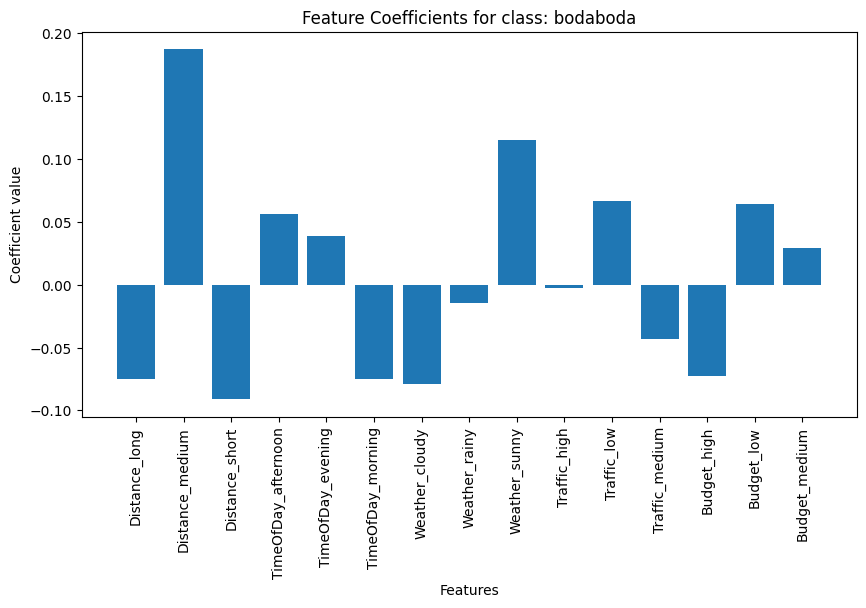

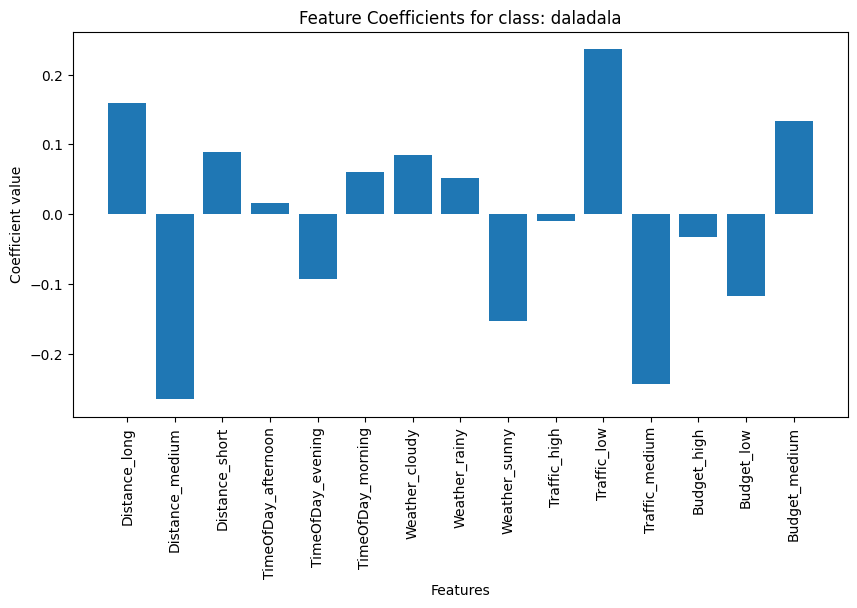

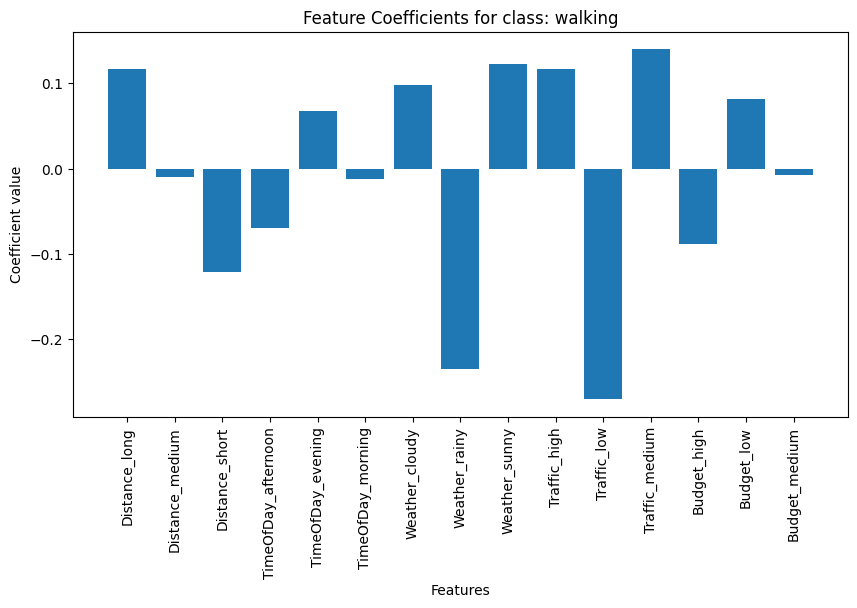

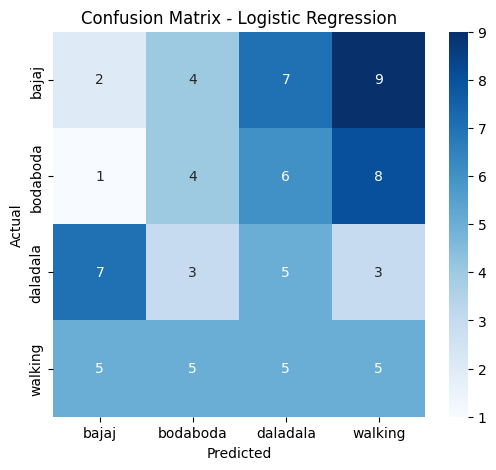

In [40]:
# Visualization for Logistic Regression

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Coefficients plot
coefficients = log_reg.coef_
feature_names = encoder.get_feature_names_out(X.columns)

# By multiclass logistic regression, we have coefficients for each class
for i, class_label in enumerate(log_reg.classes_):
    plt.figure(figsize=(10,5))
    plt.bar(range(len(coefficients[i])), coefficients[i])
    plt.xticks(range(len(coefficients[i])), feature_names, rotation=90)
    plt.title(f"Feature Coefficients for class: {class_label}")
    plt.xlabel("Features")
    plt.ylabel("Coefficient value")
    plt.show()

# Confusion Matrix (kuonyesha performance visually)
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [28]:
!pip install streamlit
!pip install streamlit-lottie


In [43]:
# Creating app (Streamlit), for easy deployment by app.py
# It will receive user inputs, show prediction to the user, predicting kind of transport etc.
# It will have option for regression and decision tree

# app.py - Professional Streamlit App with Animations

import streamlit as st
import joblib
import pandas as pd
from streamlit_lottie import st_lottie
import requests

# --- Helper function to load Lottie animation ---
def load_lottieurl(url: str):
    r = requests.get(url)
    if r.status_code != 200:
        return None
    return r.json()

# --- Load animation ---
lottie_transport = load_lottieurl("https://assets9.lottiefiles.com/packages/lf20_9xxyyb.json")

# --- App Config ---
st.set_page_config(page_title="AI Transport Predictor", page_icon="🚀", layout="centered")

# --- Header ---
st.title("🚀 AI Transport Mode Predictor - Dar es Salaam")
st.write("Smart predictions using **Decision Tree** or **Logistic Regression** models.")

# --- Show animation ---
if lottie_transport:
    st_lottie(lottie_transport, height=200, key="transport")

# --- Model Selection ---
st.sidebar.header("⚙️ Settings")
model_choice = st.sidebar.selectbox("Choose Model", ["Decision Tree", "Logistic Regression"])

if model_choice == "Decision Tree":
    model, features = joblib.load("decision_tree_transport.pkl")
else:
    model, features = joblib.load("logistic_regression_transport.pkl")

# --- User Input ---
st.header("📝 Enter Your Trip Details")
distance = st.selectbox("Distance", ["short", "medium", "long"])
time_of_day = st.selectbox("Time of Day", ["morning", "afternoon", "evening"])
weather = st.selectbox("Weather", ["sunny", "rainy", "cloudy"])
traffic = st.selectbox("Traffic", ["low", "medium", "high"])
budget = st.selectbox("Budget", ["low", "medium", "high"])

# --- Convert input to dataframe ---
input_data = pd.DataFrame({
    "Distance": [distance],
    "TimeOfDay": [time_of_day],
    "Weather": [weather],
    "Traffic": [traffic],
    "Budget": [budget]
})

# --- Encode input ---
input_encoded = pd.get_dummies(input_data)
input_encoded = input_encoded.reindex(columns=features, fill_value=0)

# --- Prediction ---
prediction = model.predict(input_encoded)[0]

# --- Display Result ---
st.success(f"🎯 Predicted Transport Mode: **{prediction}**")

# --- Footer ---
st.markdown("---")
st.markdown("Made with ❤️ by whildady | Powered by Streamlit")



2026-02-06 21:34:59.047 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 21:34:59.049 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 21:34:59.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 21:34:59.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 21:34:59.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 21:34:59.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 21:34:59.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-06 21:34:59.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [44]:
# Save Streamlit app into app.py on Colab

app_code = """
import streamlit as st
import joblib
import pandas as pd
from streamlit_lottie import st_lottie
import requests

# --- Helper function to load Lottie animation ---
def load_lottieurl(url: str):
    r = requests.get(url)
    if r.status_code != 200:
        return None
    return r.json()

# --- Load animation ---
lottie_transport = load_lottieurl("https://assets9.lottiefiles.com/packages/lf20_9xxyyb.json")

# --- App Config ---
st.set_page_config(page_title="AI Transport Predictor", page_icon="🚀", layout="centered")

# --- Header ---
st.title("🚀 AI Transport Mode Predictor - Dar es Salaam")
st.write("Smart predictions using **Decision Tree** or **Logistic Regression** models.")

# --- Show animation ---
if lottie_transport:
    st_lottie(lottie_transport, height=200, key="transport")

# --- Model Selection ---
st.sidebar.header("⚙️ Settings")
model_choice = st.sidebar.selectbox("Choose Model", ["Decision Tree", "Logistic Regression"])

if model_choice == "Decision Tree":
    model, features = joblib.load("decision_tree_transport.pkl")
else:
    model, features = joblib.load("logistic_regression_transport.pkl")

# --- User Input ---
st.header("📝 Enter Your Trip Details")
distance = st.selectbox("Distance", ["short", "medium", "long"])
time_of_day = st.selectbox("Time of Day", ["morning", "afternoon", "evening"])
weather = st.selectbox("Weather", ["sunny", "rainy", "cloudy"])
traffic = st.selectbox("Traffic", ["low", "medium", "high"])
budget = st.selectbox("Budget", ["low", "medium", "high"])

# --- Convert input to dataframe ---
input_data = pd.DataFrame({
    "Distance": [distance],
    "TimeOfDay": [time_of_day],
    "Weather": [weather],
    "Traffic": [traffic],
    "Budget": [budget]
})

# --- Encode input ---
input_encoded = pd.get_dummies(input_data)
input_encoded = input_encoded.reindex(columns=features, fill_value=0)

# --- Prediction ---
prediction = model.predict(input_encoded)[0]

# --- Display Result ---
st.success(f"🎯 Predicted Transport Mode: **{prediction}**")

# --- Footer ---
st.markdown("---")
st.markdown("Made with ❤️ by whildady | Powered by Streamlit")
"""

# Save into app.py
with open("app.py", "w") as f:
    f.write(app_code)

print("✅ app.py file saved successfully!")


✅ app.py file saved successfully!


In [45]:
from google.colab import files
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


                 Model  Accuracy
0        Decision Tree  0.215190
1  Logistic Regression  0.202532


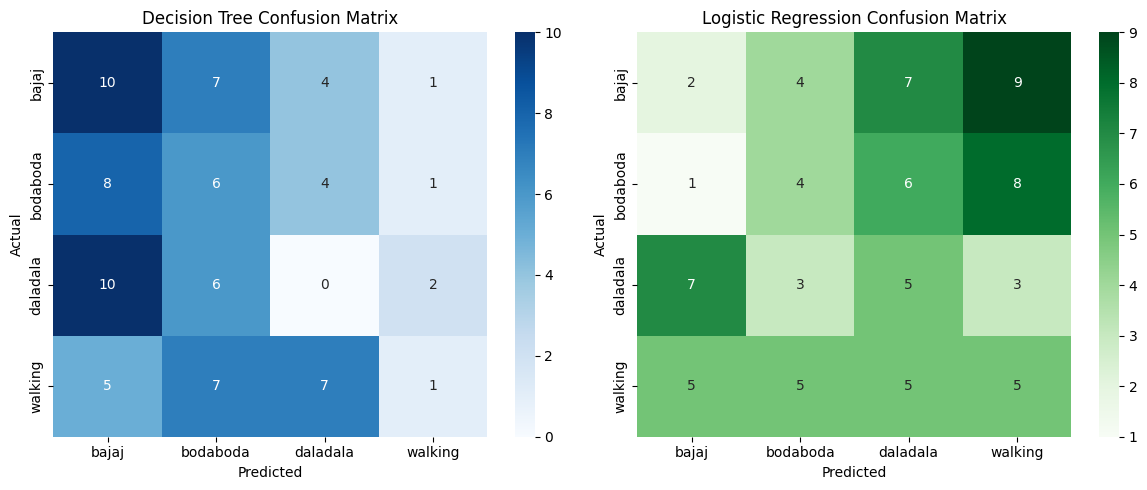

In [46]:
# CONSIDER THE CODE TO COMPARE MODEL PERFOMANCE


import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Decision Tree Evaluation ---
dt_y_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred, output_dict=True)

# --- Logistic Regression Evaluation ---
log_y_pred = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, log_y_pred)
log_report = classification_report(y_test, log_y_pred, output_dict=True)

# --- Comparison Table ---
comparison = pd.DataFrame({
    "Model": ["Decision Tree", "Logistic Regression"],
    "Accuracy": [dt_acc, log_acc]
})
print(comparison)

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, dt_y_pred, labels=dt_model.classes_),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=dt_model.classes_,
            yticklabels=dt_model.classes_,
            ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, log_y_pred, labels=log_reg.classes_),
            annot=True, fmt="d", cmap="Greens",
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_,
            ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


                 Model  Accuracy
0        Decision Tree  0.215190
1  Logistic Regression  0.202532


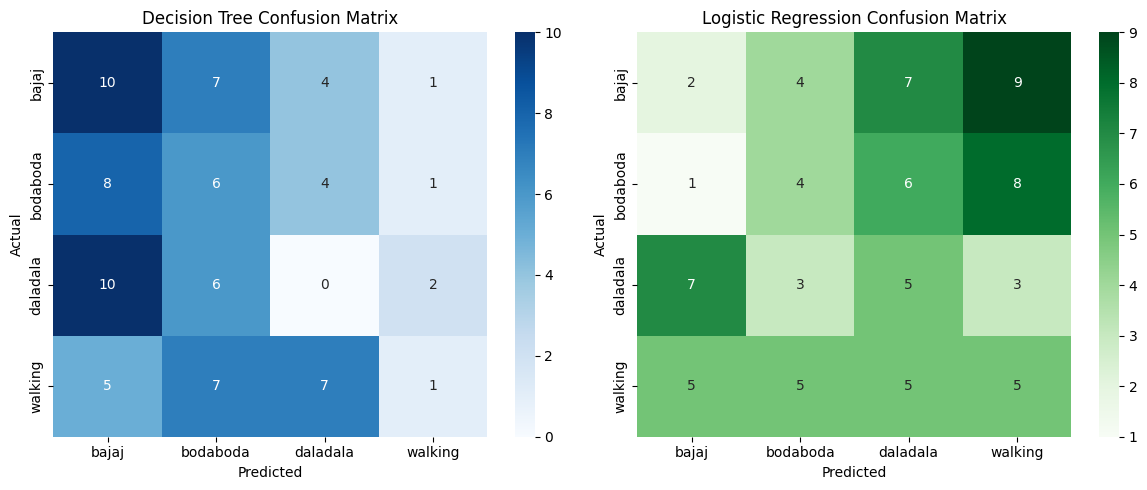

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Decision Tree Evaluation ---
dt_y_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred, output_dict=True)

# --- Logistic Regression Evaluation ---
log_y_pred = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, log_y_pred)
log_report = classification_report(y_test, log_y_pred, output_dict=True)

# --- Comparison Table ---
comparison = pd.DataFrame({
    "Model": ["Decision Tree", "Logistic Regression"],
    "Accuracy": [dt_acc, log_acc]
})
print(comparison)

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, dt_y_pred, labels=dt_model.classes_),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=dt_model.classes_,
            yticklabels=dt_model.classes_,
            ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, log_y_pred, labels=log_reg.classes_),
            annot=True, fmt="d", cmap="Greens",
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_,
            ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()
